In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
pima = pd.read_csv('diabetes.csv')

In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#결측치 확인
pima.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
list(pima)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [10]:
for i in list(pima):
  print(i, pima[i].unique())

Pregnancies [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Glucose [148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
BloodPressure [ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
SkinThickness [35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 49 63 9

In [11]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [0]:
# X, y를 구분해준다.(data & target)
X = pima.loc[:, 'Pregnancies':'Age']
y = pima.loc[:, 'Outcome']
# or Sel = [], X = pima[Sel]로 풀어도 된다. or drop!
# or pima.Outcome

In [15]:
list(X)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [0]:
# 모델 train/test 나누어주기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [0]:
# 모델만들기
clf = DecisionTreeClassifier()

In [0]:
# 모델 학습시키기
model = clf.fit(X_train, y_train)

In [0]:
# 모델 예측하기
pred = model.predict(X_test)

In [0]:
dat = pd.DataFrame({'y_test': y_test, 'prediction': pred})

In [21]:
dat

,y_test,prediction
661,1,1
122,0,0
113,0,0
14,1,0
529,0,0
103,0,0
338,1,1
588,1,0
395,0,0
204,0,1


In [23]:
#Accuracy추측해보기
(pred == y_test).sum()/len(pred)

0.7395833333333334

In [24]:
# or 다른 방식으로 accuracy 추측
metrics.accuracy_score(y_test, pred)

0.7395833333333334

In [25]:
print('Accuracy:', metrics.accuracy_score(y_test, pred))

Accuracy: 0.7395833333333334


In [26]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
# decision tree 그려주기 위해 아래 sel로 설정
Sel = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

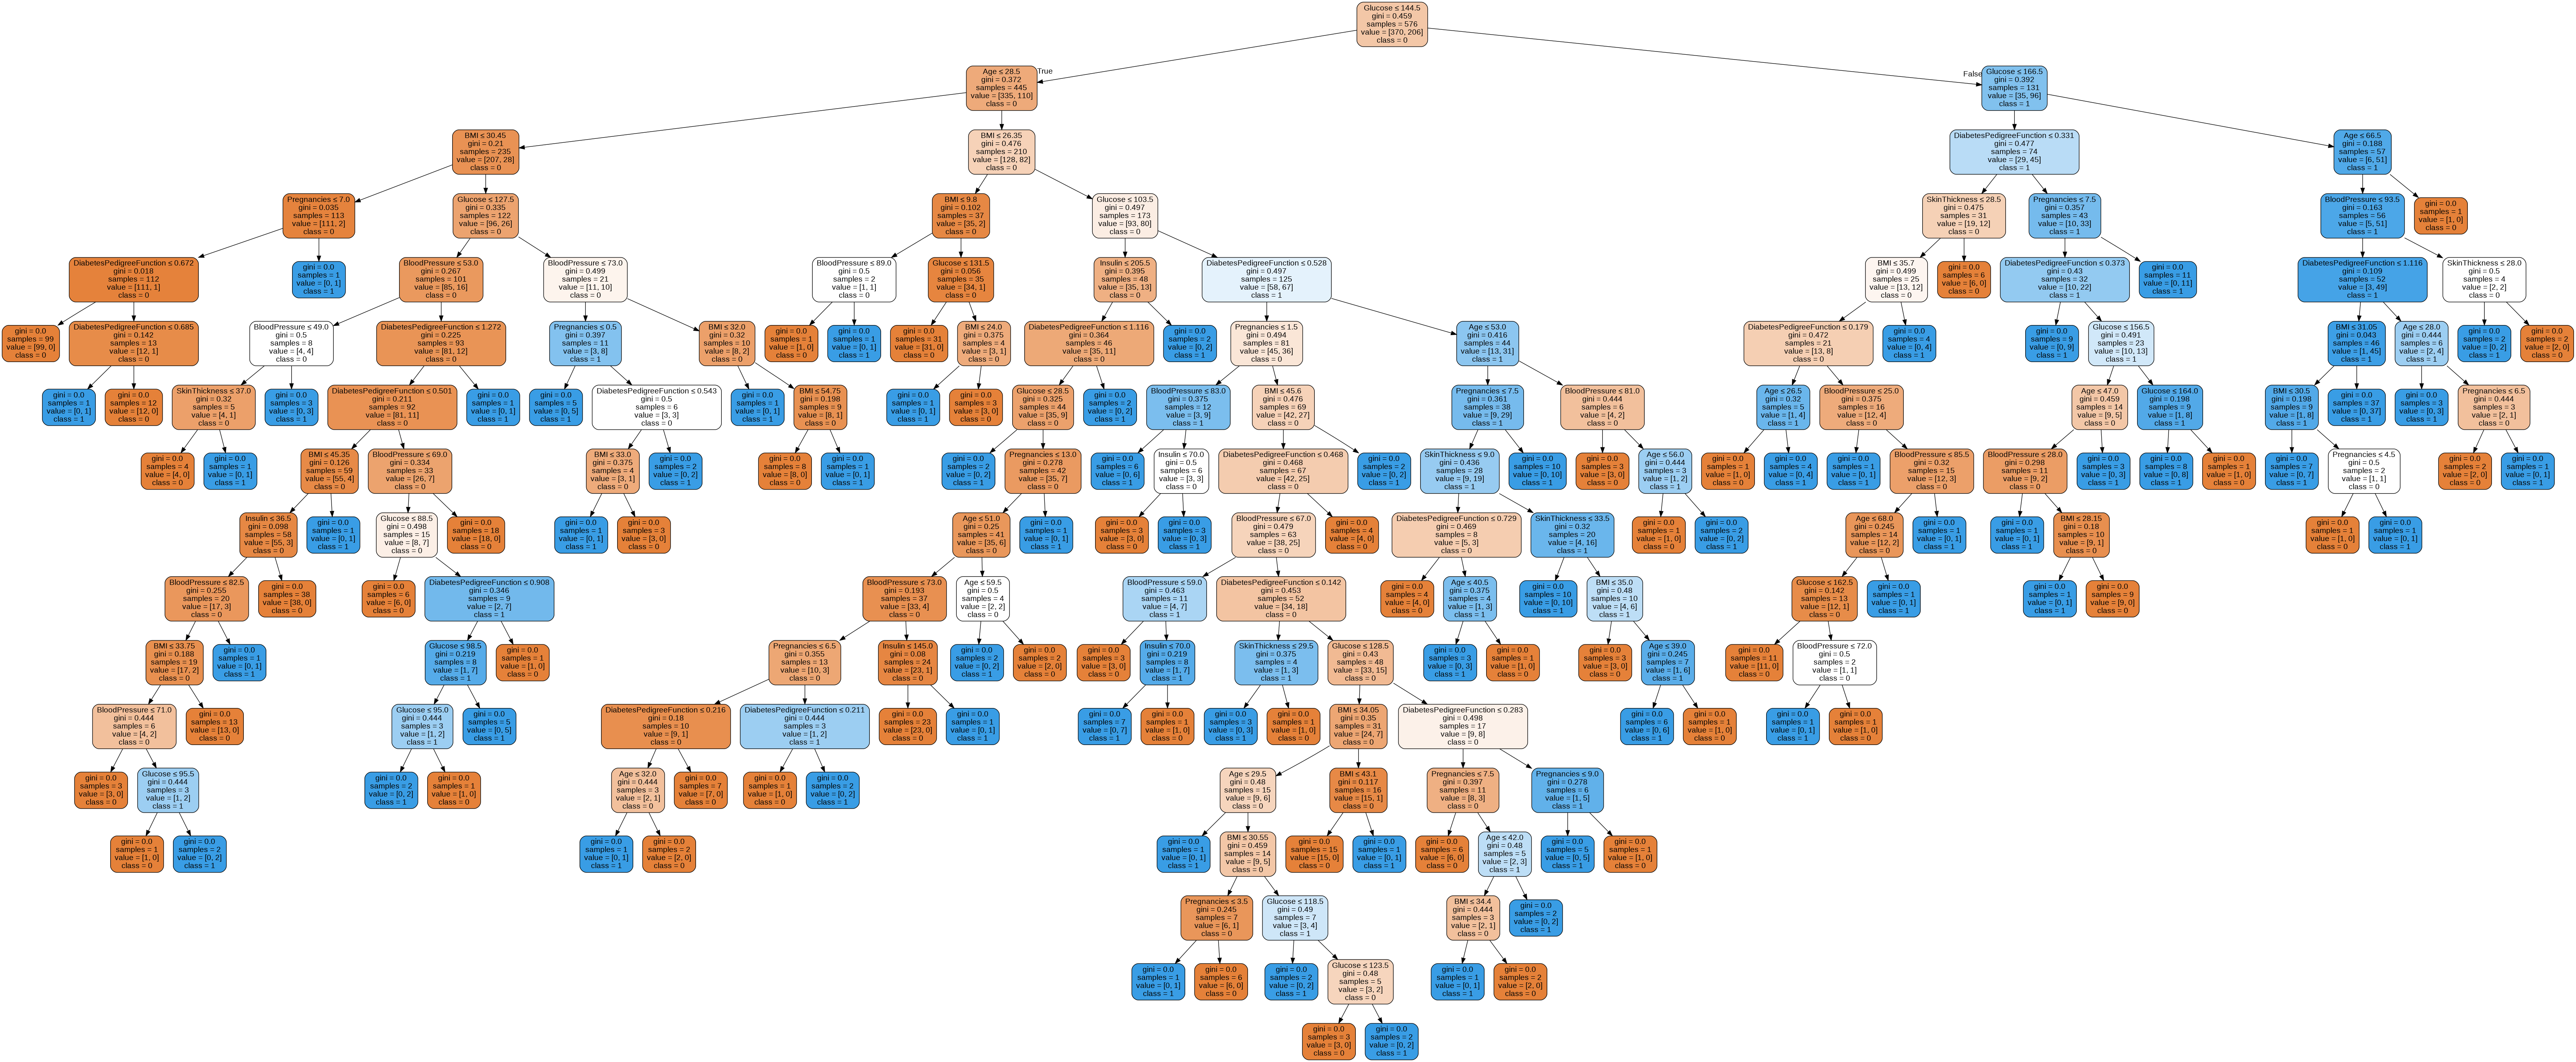

In [28]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names = Sel,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

### 성능최적화

In [29]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth = 3)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy :", metrics.accuracy_score(y_test, y_pred))

Accuracy : 0.7447916666666666


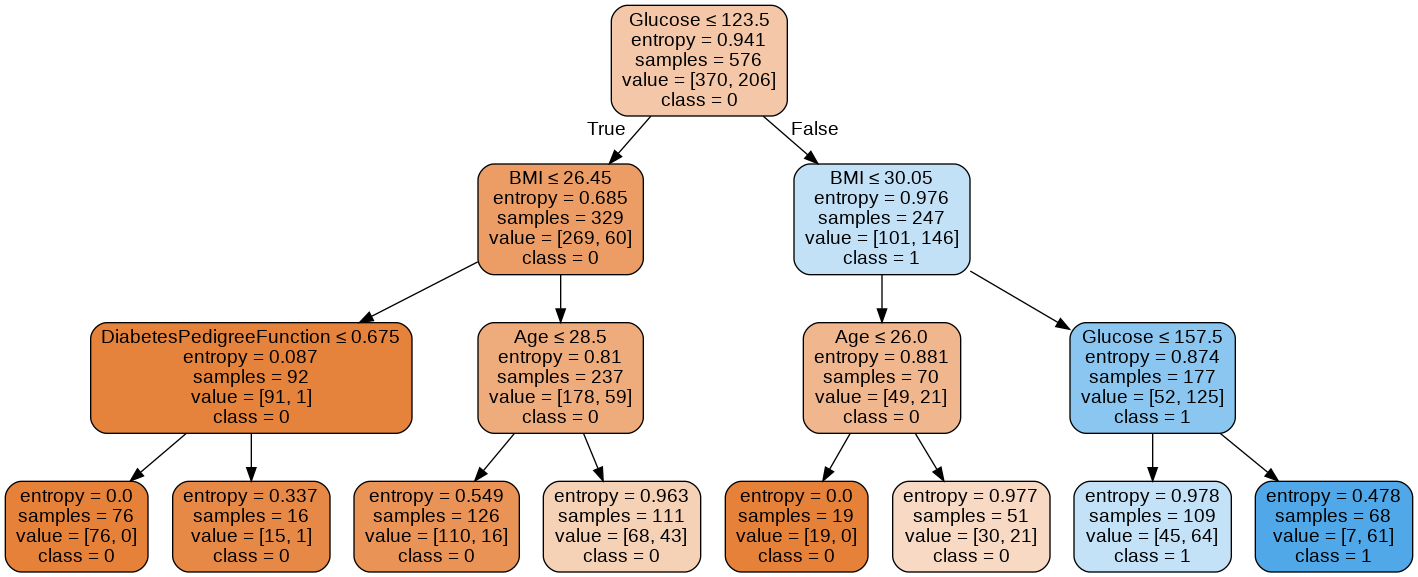

In [30]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names = Sel,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())